<a href="https://colab.research.google.com/github/angelesGladin/challenge-data-science/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [43]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300.00","6,900.00",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08
1,Mesa de comedor,Muebles,"192,300.00","8,400.00",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56
2,Juego de mesa,Juguetes,"209,600.00","15,900.00",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51
3,Microondas,Electrodomésticos,"757,500.00","41,000.00",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52
4,Silla de oficina,Muebles,"335,200.00","20,200.00",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56


In [ ]:
#insatalacion herramienta seaborn para estilizar gráficas
!pip install seaborn

#1. Análisis de facturación



In [ ]:
#función para contar productos por PRECIO y conviertiendolo a Df
def ingresos_precios(df, nombre_tienda):
    suma_tiendas = df['Precio'].sum()
    cantidad = len(df)
    return pd.DataFrame({'Tienda': [nombre_tienda], 'Conteo' : [cantidad], 'Ingreso Total' : [suma_tiendas]})

#aplicar a la funcion por cada tienda
c1 = ingresos_precios(tienda, 'Tienda 1')
c2 = ingresos_precios(tienda2, 'Tienda 2')
c3 = ingresos_precios(tienda3, 'Tienda 3')
c4 = ingresos_precios(tienda4, 'Tienda 4')

#uniendo todo para gráficar
total_suma = pd.concat([c1, c2, c3, c4], ignore_index=True)
pd.options.display.float_format = '{:,.2f}'.format
total_suma

,Tienda,Conteo,Ingreso Total
0,Tienda 1,2359,"1,150,880,400.00"
1,Tienda 2,2359,"1,116,343,500.00"
2,Tienda 3,2359,"1,098,019,600.00"
3,Tienda 4,2358,"1,038,375,700.00"


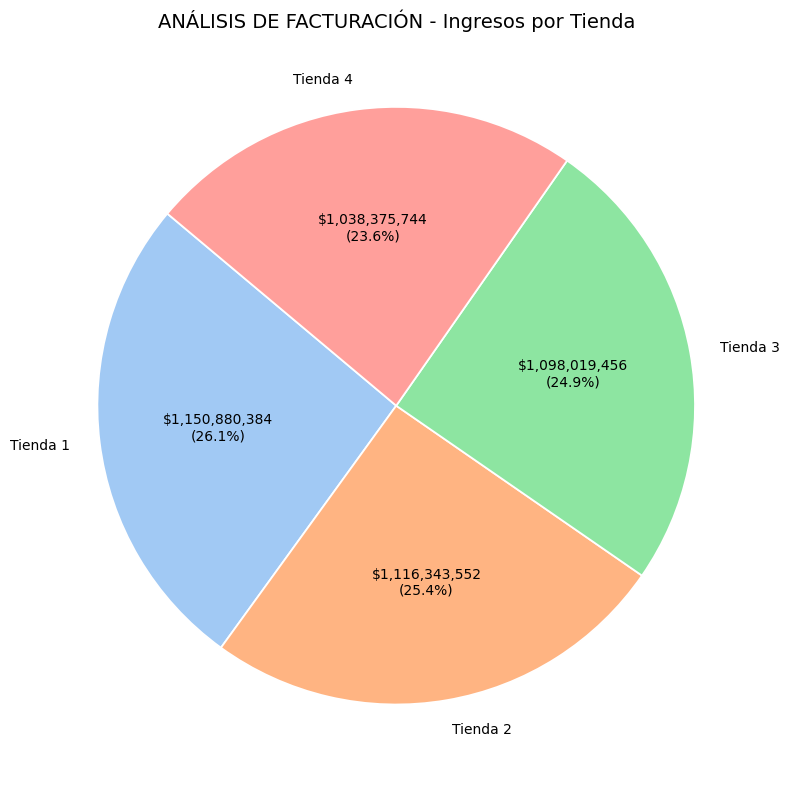

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos base
labels = total_suma['Tienda']
sizes = total_suma['Ingreso Total']

# Función para mostrar valores con formato moneda
def formato_monto(pct, all_vals):
    valor_absoluto = int(pct / 100 * sum(all_vals))
    return f'${valor_absoluto:,.0f}\n({pct:.1f}%)'

colors = sns.color_palette('pastel')
# Crear gráfico
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct=lambda pct: formato_monto(pct, sizes), startangle=140, colors=colors, shadow=False, wedgeprops={'edgecolor': 'white', 'linewidth': 1.3})

plt.title('ANÁLISIS DE FACTURACIÓN - Ingresos por Tienda', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [ ]:
#función para contar productos por categoria y conviertiendolo a Df
def conteo_categoria(df, nombre_tienda):
    conteo = df.groupby('Categoría del Producto').size().reset_index(name ='Cantidad')
    conteo['Tienda'] = nombre_tienda
    return conteo

#aplicar a la funcion por cada tienda
t1 = conteo_categoria(tienda, 'Tienda 1')
t2 = conteo_categoria(tienda2, 'Tienda 2')
t3 = conteo_categoria(tienda3, 'Tienda 3')
t4 = conteo_categoria(tienda4, 'Tienda 4')

#uniendo todo para gráficar
total = pd.concat([t1, t2, t3, t4], ignore_index=True)
total


,Categoría del Producto,Cantidad,Tienda
0,Artículos para el hogar,171,Tienda 1
1,Deportes y diversión,284,Tienda 1
2,Electrodomésticos,312,Tienda 1
3,Electrónicos,448,Tienda 1
4,Instrumentos musicales,182,Tienda 1
5,Juguetes,324,Tienda 1
6,Libros,173,Tienda 1
7,Muebles,465,Tienda 1
8,Artículos para el hogar,181,Tienda 2
9,Deportes y diversión,275,Tienda 2


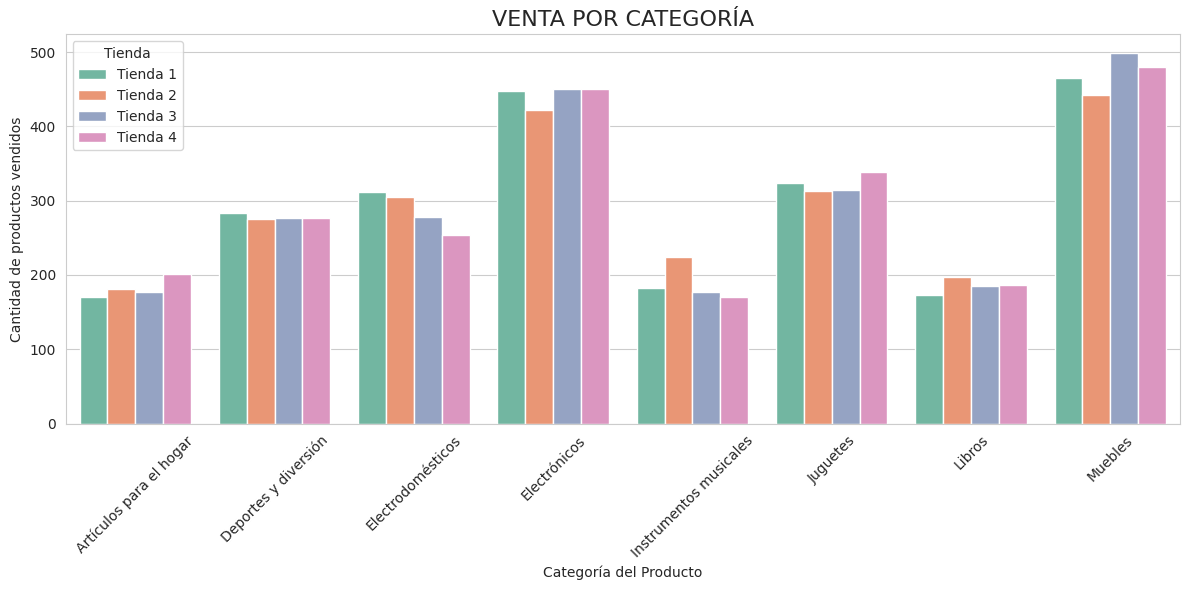

In [ ]:
#creación de gráfico con seaborn para estilizar gráfica
import seaborn as sns
import matplotlib.pyplot as plt

#Diseño de la gráfica
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data= total, x='Categoría del Producto', y='Cantidad', hue='Tienda', palette='Set2')

plt.title('VENTA POR CATEGORÍA', fontsize=16)
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad de productos vendidos')
plt.xticks(rotation=45)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
#función para calcular promedio
def promedio_tienda(df, nombre_tienda):
    cantidad = len(df)
    suma_promedio = df['Calificación'].sum()/cantidad
    return pd.DataFrame({'Tienda': [nombre_tienda], 'Conteo' : [cantidad], 'Promedio' : [suma_promedio]})

#Asignar función a cada tienda
p1 = promedio_tienda(tienda, 'Tienda 1')
p2 = promedio_tienda(tienda2, 'Tienda 2')
p3 = promedio_tienda(tienda3, 'Tienda 3')
p4 = promedio_tienda(tienda4, 'Tienda 4')

#Concatenación
total_promedio = pd.concat([p1, p2, p3, p4], ignore_index=True)
total_promedio

,Tienda,Conteo,Promedio
0,Tienda 1,2359,3.98
1,Tienda 2,2359,4.04
2,Tienda 3,2359,4.05
3,Tienda 4,2358,4.00


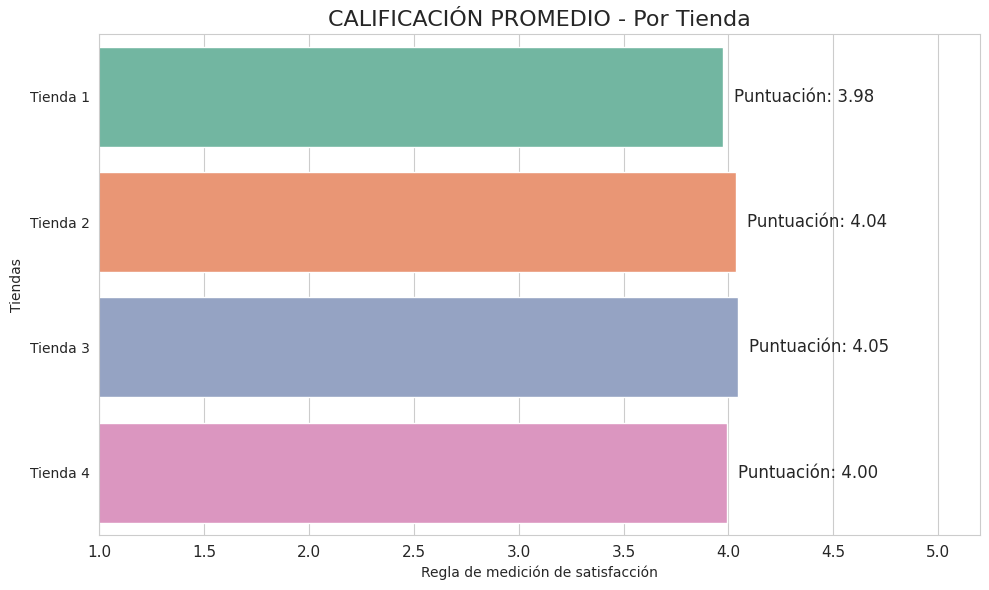

In [ ]:
# Creación gráfica del promedio con barras horizontales
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo y tamaño de la figura
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=total_promedio, y='Tienda', x='Promedio', hue='Tienda', legend=False, palette='Set2')

# Título y etiquetas
plt.title('CALIFICACIÓN PROMEDIO - Por Tienda', fontsize=16)
plt.xlabel('Regla de medición de satisfacción')
plt.ylabel('Tiendas')
plt.xticks(ticks=[x * 0.5 for x in range(2, 11)], fontsize=11)
plt.xlim(1, 5.2)

# Mostrar valores al final de cada barra
for i, valor in enumerate(total_promedio['Promedio']):
    ax.text(valor + 0.05, i, f'Puntuación: {valor:,.2f}', va='center', fontsize=12)

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [42]:
#función para contabilizar productos
def productos_tienda(df, nombre_tienda):
    conteo_productos = df['Producto'].value_counts()
    mas_vendido = conteo_productos.idxmax()
    menos_vendido = conteo_productos.idxmin()
    return pd.DataFrame({'Tienda' : [nombre_tienda], 'Producto más vendido' : [mas_vendido], 'Producto menos vendido' : [menos_vendido]})

#Aplicar a la funcion por cada tienda
m1 = productos_tienda(tienda, 'Tienda 1')
m2 = productos_tienda(tienda2, 'Tienda 2')
m3 = productos_tienda(tienda3, 'Tienda 3')
m4 = productos_tienda(tienda4, 'Tienda 4')

#Concatenación
productos_mas_menos_vendidos = pd.concat([m1, m2, m3, m4], ignore_index=True)
productos_mas_menos_vendidos

,Tienda,Producto más vendido,Producto menos vendido
0,Tienda 1,Microondas,Auriculares con micrófono
1,Tienda 2,Iniciando en programación,Juego de mesa
2,Tienda 3,Kit de bancas,Bloques de construcción
3,Tienda 4,Cama box,Guitarra eléctrica


# 5. Envío promedio por tienda

In [ ]:
#función para calcular promedio del envío de cada tienda
def promedio_tienda_envio(df, nombre_tienda):
    contador_envio = len(df)
    suma_promedio_envio = df['Costo de envío'].sum()/contador_envio
    return pd.DataFrame({'Tienda': [nombre_tienda], 'Conteo' : [contador_envio], 'Promedio' : [suma_promedio_envio]})

#Aplicación de la función a todas las tiendas

e1 = promedio_tienda_envio(tienda, 'Tienda 1')
e2 = promedio_tienda_envio(tienda2, 'Tienda 2')
e3 = promedio_tienda_envio(tienda3, 'Tienda 3')
e4 = promedio_tienda_envio(tienda4, 'Tienda 4')

#concatenación
promedio_envios = pd.concat([e1, e2, e3, e4], ignore_index=True)
promedio_envios

,Tienda,Conteo,Promedio
0,Tienda 1,2359,"26,018.61"
1,Tienda 2,2359,"25,216.24"
2,Tienda 3,2359,"24,805.68"
3,Tienda 4,2358,"23,459.46"


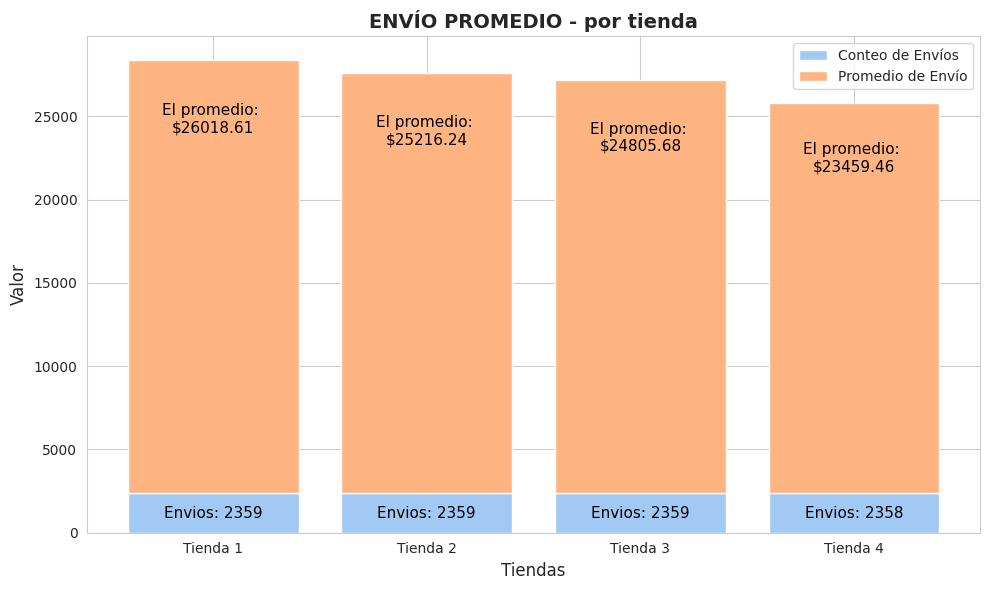

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set_style("whitegrid")
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize=(10,6))

# Datos base
tiendas = promedio_envios['Tienda']
conteo = promedio_envios['Conteo']
promedio = promedio_envios['Promedio']
ax.bar(tiendas, conteo, label='Conteo de Envíos')
ax.bar(tiendas, promedio, bottom=conteo, label='Promedio de Envío')

# Mostrar valores en cada sección de la barra
for i in range(len(promedio_envios)):
    tienda = tiendas[i]
    c = conteo[i]
    p = promedio[i]

    # Texto sobre la barra de Conteo
    ax.text(i, c / 2, f'Envios: {c:.0f}', ha='center', va='center', color='black', fontsize=11)

    # Texto sobre la parte superior del Promedio
    top = c + p
    ax.text(i, top - (p * 0.1), f'El promedio: \n${p:.2f}', ha='center', va='top', color='black', fontsize=11)

# Títulos y etiquetas
ax.set_title('ENVÍO PROMEDIO - por tienda', fontsize=14, fontweight='bold')
ax.set_xlabel('Tiendas', fontsize=12)
ax.set_ylabel('Valor', fontsize=12)
ax.set_xticks(range(len(tiendas)))
ax.set_xticklabels(tiendas)
ax.legend()
plt.tight_layout()
plt.show()

**<center>INFORME FINAL</CENTER>**

📊 Informe de Análisis Comparativo de Tiendas
📌 Introducción
El propósito de este informe es realizar un análisis comparativo del desempeño de cuatro tiendas, con el fin de identificar cuál de ellas representa la mejor oportunidad para enfocar las estrategias de venta. Para ello, se evaluaron distintos aspectos clave como los ingresos totales, categorías más y menos vendidas, calificaciones promedio de los clientes, productos más y menos vendidos y costos de envío. Este análisis se apoya tanto en los datos proporcionados como en las visualizaciones generadas.

📈 Desarrollo
1. 🧾 Ingresos Totales por Tienda

Tienda	Conteo de Ventas	Ingreso Total
Tienda 1	2,359	$1,150,880,400.00
Tienda 2	2,359	$1,116,343,500.00
Tienda 3	2,359	$1,098,019,600.00
Tienda 4	2,358	$1,038,375,700.00
Análisis:
Tienda 1 lidera en ingresos totales, lo que sugiere un excelente desempeño comercial. Aunque las demás tiendas tienen un número similar de ventas, el monto recaudado por Tienda 1 es significativamente mayor, lo que podría deberse a productos de mayor valor o a una mejor gestión comercial.

2. 🛍️ Categorías Más y Menos Vendidas
Categoría más vendida en todas las tiendas:
➡️ Muebles

Categoría menos vendida por tienda:


Tienda	Categoría menos vendida
Tienda 1	Artículos para el hogar (171)
Tienda 2	Artículos para el hogar (181)
Tienda 3	Instrumentos musicales (177)
Tienda 4	Instrumentos musicales (170)
Análisis:
La consistencia de la categoría “Muebles” como la más vendida resalta una tendencia del consumidor. Por otro lado, “Artículos para el hogar” e “Instrumentos musicales” presentan baja rotación, lo que indica áreas que pueden requerir ajustes en promoción o surtido.

3. ⭐ Calificaciones Promedio por Tienda

Tienda	Promedio de Calificación
Tienda 1	3.98
Tienda 2	4.04
Tienda 3	4.05
Tienda 4	4.00
Análisis:
Tienda 3 presenta la mejor calificación promedio, lo que refleja un mayor nivel de satisfacción por parte de los clientes. Aunque las diferencias son pequeñas, este aspecto podría ser crucial en decisiones de fidelización.

4. 🎯 Productos Más y Menos Vendidos

Tienda	Producto Más Vendido	Producto Menos Vendido
Tienda 1	Microondas	Auriculares con micrófono
Tienda 2	Iniciando en programación	Juego de mesa
Tienda 3	Kit de bancas	Bloques de construcción
Tienda 4	Cama box	Guitarra eléctrica
Análisis:
Cada tienda muestra particularidades en sus productos estrella y de bajo desempeño. Esto sugiere diferentes perfiles de consumidor según la tienda, lo cual es útil para definir estrategias de surtido personalizado.

5. 🚚 Costo de Envío Promedio

Tienda	Promedio de Envío
Tienda 1	$26,018.61
Tienda 2	$25,216.24
Tienda 3	$24,805.68
Tienda 4	$23,459.46
Análisis:
Tienda 4 destaca por tener el costo de envío más bajo. Aunque esto puede resultar atractivo para los clientes, es importante considerar si esto afecta el margen de ganancia. Tienda 1 tiene el envío más caro, aunque también es la que más ingresa.

✅ Conclusión y Recomendación
Tras el análisis integral de los diferentes indicadores:

Tienda 1 lidera en ingresos totales, con un buen equilibrio de ventas y diversidad de productos vendidos, lo que sugiere una estrategia comercial efectiva.

Tienda 3 destaca en satisfacción del cliente, siendo la mejor calificada.

Tienda 4, aunque con menores ingresos, muestra eficiencia en el costo de envío, lo cual podría aprovecharse en campañas de atracción de clientes.

🔎 Recomendación:
Se recomienda enfocar las estrategias de venta y expansión en la Tienda 1, ya que presenta una combinación de alto volumen de ingresos, variedad de productos vendidos y buen desempeño general. Aunque la calificación promedio no es la más alta, se mantiene competitiva. Su capacidad para generar ingresos justifica posibles inversiones adicionales en logística (como mejorar costos de envío) o atención al cliente (para aumentar su puntuación).

